In [1]:
def RANDOMIZEDMOTIFSEARCH(Dna, k, t):
    Motifs=list()
    for n in range(len(Dna)):
        rdm_posi=random.randint(0, (len(Dna[n])-(k)))
        Motifs.append(Dna[n][rdm_posi:rdm_posi+k])
    BestMotifs=Motifs
    #print BestMotifs

    while True:
        Profile=MakeProfile(Motifs)
        Motifs=list()
        for n in range(len(Dna)):
            Motifs.append(Profile_most(Dna[n],k,Profile))
        Motif_score= d(Consensus(MakeProfile(Motifs)), Motifs)
        if Motif_score < d(Consensus(MakeProfile(BestMotifs)), BestMotifs):
                BestMotifs=Motifs
        else:
            return BestMotifs,Motif_score

In [19]:
import random
from numpy import *
import numpy as np
import time
start_time = time.time()

#--
def NumberToPattern(Number, k):
    d={'A':0,'C':1,'G':2,'T':3}
    pattern=[]
    if k==1:
        #return d.keys()[d.values().index(Number)]
        return (list(d.keys())[list(d.values()).index(int(Number))])
    prefixIndex = Number//4
    r = Number%4
    PrefixPattern = NumberToPattern(prefixIndex, (k-1))
    symbol = (list(d.keys())[list(d.values()).index(r)])
    return (PrefixPattern+symbol)

def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])
#--
def Consensus(Profile):
    maxarg= list(Profile.argmax(0))
    Cons=''
    for posi in maxarg:
        Cons+=NumberToPattern(int(posi), 1)
    return Cons
#--
def d(Pattern, Dna):
    score=0
    k=len(Pattern)
    for i in range(0,len(Dna)):
        Hamdist={}
        minDist={}
        seq=Dna[i]
        for n in range(0,len(seq)-(k-1)):
            Hamdist[seq[n:n+k]]=HammingDistance(Pattern,seq[n:n+k])
        minimum=int(min(Hamdist.values()))
        score+=minimum
    return(score)

#--
def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    #return matrix_occ.sum(axis=0, dtype='float')
    return Profile_matrix  

def HammingDistance(p,q):
    HamDi=int(0)
    for i in range(len(p)):
        if p[i]==q[i]:
            continue
        else:
            HamDi+=+1
    return(HamDi)
##################

Motifs=['GCGTAACCCTATCTG', 'TAACCCTATCTGCCT', 'ACGGTATCCAACTCC', 'CAAAAATTCTGACCT', 'GGGGAACTGTATTAA', 'AAGGCATATTAGACA', 'CGGCGTTTCTTGCCG', 'ATCTACTGTGAGCCT', 'TAAGACCTATATTTC', 'TAAAGCTTTCTCTCG', 'GGGTGGGAAGAGGAA', 'GATTGGTGTTGGCTG', 'AGCTTTTAGCTAGTC', 'TTCGGTATACTCGAC', 'GATTCAGTCATGACG', 'GGGAGCTGAATGTCA', 'ATAGAAGACTAGAAA', 'CCATTGATCAGAAAC', 'TTATAGTCTAGCCCA', 'GGAATTTCCTAGGTG']
i=0
while i<1000:
    
    Motif_score= d(Consensus(MakeProfile(Motifs)), Motifs)
    i+=1
print Motif_score
print ('The script took '+str(time.time()-start_time)+' s')

#############
start_time=time.time()
from collections import Counter
def score(motifs):
    # change to motifs as list of columns instead of list of rows
    matrix = [[] for k in range(len(motifs[0]))]
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            matrix[i].append(motifs[j][i])
    score = 0
    #print matrix
    for col in range(len(matrix)):
        # count letters in a column, delete most common letter, sum remaining
        c = Counter(matrix[col])
        #print c
        del c[c.most_common(1)[0][0]]
        score += sum(c.values())
    return score

Motifs=['GCGTAACCCTATCTG', 'TAACCCTATCTGCCT', 'ACGGTATCCAACTCC', 'CAAAAATTCTGACCT', 'GGGGAACTGTATTAA', 'AAGGCATATTAGACA', 'CGGCGTTTCTTGCCG', 'ATCTACTGTGAGCCT', 'TAAGACCTATATTTC', 'TAAAGCTTTCTCTCG', 'GGGTGGGAAGAGGAA', 'GATTGGTGTTGGCTG', 'AGCTTTTAGCTAGTC', 'TTCGGTATACTCGAC', 'GATTCAGTCATGACG', 'GGGAGCTGAATGTCA', 'ATAGAAGACTAGAAA', 'CCATTGATCAGAAAC', 'TTATAGTCTAGCCCA', 'GGAATTTCCTAGGTG']
i=0
while i<1000:
    
    Motif_score= score(Motifs)
    i+=1
print Motif_score
print ('The script took '+str(time.time()-start_time)+' s')

177
The script took 1.60873699188 s
177
The script took 0.927149057388 s


In [62]:


import random
from numpy import *
import numpy as np
import time
start_time = time.time()

#--
def NumberToPattern(Number, k):
    d={'A':0,'C':1,'G':2,'T':3}
    pattern=[]
    if k==1:
        #return d.keys()[d.values().index(Number)]
        return (list(d.keys())[list(d.values()).index(int(Number))])
    prefixIndex = Number//4
    r = Number%4
    PrefixPattern = NumberToPattern(prefixIndex, (k-1))
    symbol = (list(d.keys())[list(d.values()).index(r)])
    return (PrefixPattern+symbol)

def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])
#--
def Consensus(Profile):
    maxarg= list(Profile.argmax(0))
    Cons=''
    for posi in maxarg:
        Cons+=NumberToPattern(int(posi), 1)
    return Cons
#--
def d(Pattern, Dna):
    score=0
    k=len(Pattern)
    for i in range(0,len(Dna)):
        Hamdist={}
        minDist={}
        seq=Dna[i]
        for n in range(0,len(seq)-(k-1)):
            Hamdist[seq[n:n+k]]=HammingDistance(Pattern,seq[n:n+k])
        minimum=int(min(Hamdist.values()))
        score+=minimum
    return(score)

def HammingDistance(p,q):
    HamDi=int(0)
    for i in range(len(p)):
        if p[i]==q[i]:
            continue
        else:
            HamDi+=+1
    return(HamDi)

#--
def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    #Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    #return matrix_occ.sum(axis=0, dtype='float')
    return matrix_occ  

##################

Motifs=['GCGTAACCCTATCTG', 'TAACCCTATCTGCCT', 'ACGGTATCCAACTCC', 'CAAAAATTCTGACCT', 'GGGGAACTGTATTAA', 'AAGGCATATTAGACA', 'CGGCGTTTCTTGCCG', 'ATCTACTGTGAGCCT', 'TAAGACCTATATTTC', 'TAAAGCTTTCTCTCG', 'GGGTGGGAAGAGGAA', 'GATTGGTGTTGGCTG', 'AGCTTTTAGCTAGTC', 'TTCGGTATACTCGAC', 'GATTCAGTCATGACG', 'GGGAGCTGAATGTCA', 'ATAGAAGACTAGAAA', 'CCATTGATCAGAAAC', 'TTATAGTCTAGCCCA', 'GGAATTTCCTAGGTG']
i=0
while i<1000:
    
    Profile= MakeProfile(Motifs)
    i+=1
print Profile
print ('The script took '+str(time.time()-start_time)+' s')

#############
start_time=time.time()
from collections import Counter
from __future__ import division
def profileMotifs(motifs):
    # construct profile-matrix (each column as an dict) from count-matrix
    profile = countMotifs(motifs)
    #return profile
    for d in profile:
        #return d
        for key in d: 
            d[key] = d[key]/(len(motifs)+4) # +4 due to pseudocounts
    return profile

def countMotifs(motifs):
    # counter-matrix: a list of dicts for each column in motifs-matrix
    counter = [{"A":1,"C":1,"G":1,"T":1} for x in range(len(motifs[0]))] # start with pseudocounts
    #return counter
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            letter = motifs[j][i]
            counter[i].update({letter:1+counter[i][letter]})                
    return counter

Motifs=['GCGTAACCCTATCTG', 'TAACCCTATCTGCCT', 'ACGGTATCCAACTCC', 'CAAAAATTCTGACCT', 'GGGGAACTGTATTAA', 'AAGGCATATTAGACA', 'CGGCGTTTCTTGCCG', 'ATCTACTGTGAGCCT', 'TAAGACCTATATTTC', 'TAAAGCTTTCTCTCG', 'GGGTGGGAAGAGGAA', 'GATTGGTGTTGGCTG', 'AGCTTTTAGCTAGTC', 'TTCGGTATACTCGAC', 'GATTCAGTCATGACG', 'GGGAGCTGAATGTCA', 'ATAGAAGACTAGAAA', 'CCATTGATCAGAAAC', 'TTATAGTCTAGCCCA', 'GGAATTTCCTAGGTG']
i=0
while i<1000:
    
    Profile= profileMotifs(Motifs)
    i+=1
print Profile
kmer='GCGTAACCCTATCTG'
prob = Profile[0].get(kmer[0],0)
print prob, Profile[0],kmer[0]
print ('The script took '+str(time.time()-start_time)+' s')

[[  6.   8.   9.   5.   8.   8.   3.   6.   5.   6.  10.   4.   5.   6.
    7.]
 [  4.   4.   4.   3.   4.   6.   4.   5.   9.   5.   1.   5.   8.  11.
    6.]
 [  8.   7.   8.   7.   7.   5.   4.   4.   3.   3.   5.  11.   5.   1.
    7.]
 [  6.   5.   3.   9.   5.   5.  13.   9.   7.  10.   8.   4.   6.   6.
    4.]]
The script took 1.48285412788 s
[{'A': 0.25, 'C': 0.16666666666666666, 'T': 0.25, 'G': 0.3333333333333333}, {'A': 0.3333333333333333, 'C': 0.16666666666666666, 'T': 0.20833333333333334, 'G': 0.2916666666666667}, {'A': 0.375, 'C': 0.16666666666666666, 'T': 0.125, 'G': 0.3333333333333333}, {'A': 0.20833333333333334, 'C': 0.125, 'T': 0.375, 'G': 0.2916666666666667}, {'A': 0.3333333333333333, 'C': 0.16666666666666666, 'T': 0.20833333333333334, 'G': 0.2916666666666667}, {'A': 0.3333333333333333, 'C': 0.25, 'T': 0.20833333333333334, 'G': 0.20833333333333334}, {'A': 0.125, 'C': 0.16666666666666666, 'T': 0.5416666666666666, 'G': 0.16666666666666666}, {'A': 0.25, 'C': 0.208333333

In [4]:
'''Pr(kmer,Profile)
return probability of kmer matching a profile'''

def Pr(kmer,Profile):
    score=1
    for i in range(0,len(kmer)):
        probaN=Profile[PatternToNumber(kmer[i])][i]
        score *= probaN
    return score

###############################################################
from numpy import *
kmer='TGCCCG'
Profile=array([[ 0.364,0.333,0.303,0.212,0.121,0.242],
 [0.182,0.182,0.212,0.303,0.182,0.303],
 [ 0.121,0.303,0.182,0.273,0.333,0.303],
 [ 0.333,0.182 ,0.303 ,0.212,0.364 ,0.152]])

#Profile=array(profile.transpose())
print Profile
print(Pr(kmer,Profile))

[[ 0.364  0.333  0.303  0.212  0.121  0.242]
 [ 0.182  0.182  0.212  0.303  0.182  0.303]
 [ 0.121  0.303  0.182  0.273  0.333  0.303]
 [ 0.333  0.182  0.303  0.212  0.364  0.152]]


NameError: global name 'PatternToNumber' is not defined

[0.16666666666666666, 0.3333333333333333, 0.4999999999999999]
[2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2]


(array([ 14.,   0.,   0.,   0.,   0.,  33.,   0.,   0.,   0.,  53.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

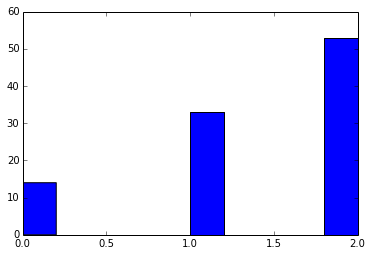

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np
kmerpr=[0.1, 0.2, 0.3]
prarray=[v/sum(kmerpr) for v in kmerpr]

print prarray
x=0
liste=list()
while x <100:
    i = np.random.choice( len(kmerpr), p=prarray )
    liste.append(i)    
    x+=1
print liste
plt.hist(liste)

In [11]:
'''Random(array)
this random number generator, denoted Random(array), where array=(p1, …, pn), 
models an n-sided biased die and returns integer i with probability pi'''


def Pr(kmer,Profile):
    score=1
    for i in range(0,len(kmer)):
        probaN=Profile[PatternToNumber(kmer[i])][i]
        score *= probaN
    return score

def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    #return matrix_occ.sum(axis=0, dtype='float')
    return Profile_matrix  

def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])

def Random(Motif_list,Profile):
    Array=list()
    for motif in Motif_list:
        Array.append(Pr(motif,Profile))
    PArray=[v/sum(Array) for v in Array]
    i = np.random.choice( len(PArray), p=PArray)
    return i

Motif_list=['TGACTTATATCTAGA', 'TCTGGCACTAACTAC', 'CTGACGCCAGGTGCT', 'CTGGTTCCTTATATT', 'AATGTACGGATACCC', 'AGTAGAACTGCGTGT', 'GAGCAACATCGGAGT', 'TGGATCAAAGTTGAG', 'GATCAATTAAACGTT', 'GTACTCCGCCTTGTG', 'CATTTCGCTCTTGGA', 'AGCTGTCGCCGTGGA', 'ATGCCGCAGCAGCAG', 'GTGCCCCTCTGGTGT', 'CCCTAAACTCTATGA', 'GATTTGAATGACGAG', 'CCGCCCTCTAGCGAT', 'ACACGCAGGCGCTGT', 'CCATGGAGTTTCCAT', 'AATGTACATTGAGAG']
print len(Motif_list)

print Random(Motif_list)




20
19


In [3]:
import random
from numpy import *
import numpy as np
from collections import Counter

def score(motifs):
    # change to motifs as list of columns instead of list of rows
    matrix = [[] for k in range(len(motifs[0]))]
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            matrix[i].append(motifs[j][i])
    score = 0
    for col in range(len(matrix)):
        # count letters in a column, delete most common letter, sum remaining
        c = Counter(matrix[col])
        del c[c.most_common(1)[0][0]]
        score += sum(c.values())
    return score

def Pr(kmer,Profile):
    score=1
    for i in range(0,len(kmer)):
        probaN=Profile[PatternToNumber(kmer[i])][i]
        score *= probaN
    return score

def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    #return matrix_occ.sum(axis=0, dtype='float')
    return Profile_matrix  

def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])

def Random(Motif_list,Profile):
    Array=list()
    for motif in Motif_list:
        Array.append(Pr(motif,Profile))
    PArray=[v/sum(Array) for v in Array]
    i = np.random.choice( len(PArray), p=PArray)
    return i

def GIBBSSAMPLER(Dna, k, t, N):

    #dic for faster indexing of kmers
    dic={}
    for t in range(len(Dna)):
        dic[t]=list()
        for n in range(0,len(Dna[t])-(k-1)):
            dic[t].append(Dna[t][n:n+k])

    #get first set of Motifs 
    Motifs=list()
    for n in range(len(Dna)):
        rdm_posi=random.randint(0, (len(Dna[n])-(k)))
        Motifs.append(Dna[n][rdm_posi:rdm_posi+k])
        BestMotifs=Motifs[:]
        BestScore=score(BestMotifs)

    ###        

    x=0
    while x < N:
        i=(Random(Motifs,MakeProfile(Motifs)))
        Motifs.remove(Motifs[i])
        Profile_sans=MakeProfile(Motifs)
        ii=Random(dic[i],Profile_sans)    
        Motifs_i= dic[i][ii]  
        Motifs.insert(i,Motifs_i)
        sM=score(Motifs)
        if sM < BestScore:
            BestScore=sM
            BestMotifs=Motifs[:]
            #print BestMotifs, sM,BestScore, x
            x+=1
        else: 
            x+=1
            #print BestMotifs, score(BestMotifs),x
    return BestMotifs, score(BestMotifs)

################################################################################
'''
k=4
t=5
N=100
Dna=['TTACCTTAAC', 'GATGTCTGTC', 'CCGGCGTTAG', 'CACTAACGAG', 'CGTCAGAGGT']
'''

f = open('../../Downloads/rosalind_ba2g.txt','r')

lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
Dna=lines[1:]
print '\n'.join(GIBBSSAMPLER(Dna, k, t, N)[0])

TGGTTGAGTACCGAT
CGTGACACGTTCGAT
CAGAAGCCAGAGTTT
TGATTCGAGACTCTT
GATAATTGCCTAGAT
AATCATCGACCGGTC
GCGCTTGTGTTGAGG
TGAAACCTCTTTACC
CATATCCCGGATGCT
CATTATCTGTCTGAC
TCTCTTCCGTCTGTC
CGGCCTCGTCCCTCG
CGTCCTCATACTGCT
CGGATACACATGGTC
CTACTCGATACGCAC
TCTGTTCGTATAGGA
TAAGGACGACGGGTG
AGTCTTAAAAGTGGG
ATCTCCACGTATGGA
CGTCTTCGACGTGAT


In [ ]:
from Bioinf_functions import D